## Diving into continuous futures data with Nasdaq Data Link

<h2 style="color:red;">As of August 2024 (after the publication of <em>Python for Algorithmic Trading Cookbook</em>), Nasdaq as discontinued access to the <code>CHRIS</code> database. According to Nasdaq, there is no replacement for futures data. Since the code in this notebook uses the <code>CHRIS</code> database, it will not work. I'm as disappointed as you are since there was no forewarning from Nasdaq.</h2>
<p>See <code>01d_fetching_historic_futures_data_with_the_openbb_platform.ipynb</code> for an alternative.</p>

In [ ]:
import nasdaqdatalink
from IPython.display import display

In [ ]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches data for the specified NASDAQ dataset and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1")

In [ ]:
display(data)

Fetches the data in numpy array format for the specified dataset

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", returns="numpy")

In [ ]:
display(data)

Fetches data for the specified dataset within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1", start_date="2001-12-31", end_date="2005-12-31"
)

In [ ]:
display(data)

Fetches data for a specific column in the dataset within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1.8", start_date="2001-12-31", end_date="2005-12-31"
)

In [ ]:
display(data)

Fetches data for the specified dataset with monthly aggregation and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", collapse="monthly")

In [ ]:
display(data)

Defines a list of contract codes to fetch data for multiple contracts

In [ ]:
contracts = [
    "CHRIS/CME_ES1.6",
    "CHRIS/CME_ES2.6",
    "CHRIS/CME_ES3.6",
    "CHRIS/CME_ES4.6",
]

Fetches data for the specified contracts within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(contracts, start_date="2015-01-01", end_date="2015-12-31")

Plots the data for the first contract on the first available date

In [ ]:
data.iloc[0].plot(title=f"ES on {data.index[0]}")

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Exploring S&P 500 ratios data with Nasdaq Data Link

<h2 style="color:red;">As of August 2024 (after the publication of <em>Python for Algorithmic Trading Cookbook</em>), Nasdaq as discontinued access to the <code>MULTPL</code> database. According to Nasdaq, there is no replacement for financial multiples data. Since the code in this notebook uses the <code>MULTPL</code> database, it will not work. I'm as disappointed as you are since there was no forewarning from Nasdaq.</h2>

In [ ]:
import nasdaqdatalink
from IPython.display import display

In [ ]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches S&P 500 dividend yield data and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("MULTPL/SP500_DIV_YIELD_MONTH")

In [ ]:
display(data)

Plots the S&P 500 dividend yield data with the specified title

In [ ]:
data.plot(title="S&P 500 dividend yield (12 month dividend per share)/price")

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Working with stock market data with the OpenBB Platform

In [1]:
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "SPY" using the "yfinance" provider and displays the first 10 rows

In [3]:
data = obb.equity.price.historical("SPY", provider="yfinance")

In [4]:
display(data.head(10))

,open,high,low,close,volume,split_ratio,dividend,capital_gains
date,,,,,,,,
2023-06-20,437.450012,438.369995,435.029999,437.179993,76160400,0.0,0.0,0.0
2023-06-21,436.160004,436.989990,434.329987,434.940002,76982300,0.0,0.0,0.0
2023-06-22,433.950012,436.619995,433.600006,436.510010,70637200,0.0,0.0,0.0
2023-06-23,432.929993,435.059998,432.470001,433.209991,92074500,0.0,0.0,0.0
2023-06-26,432.619995,434.609985,431.190002,431.440002,72823600,0.0,0.0,0.0
2023-06-27,432.350006,436.809998,431.880005,436.170013,72813700,0.0,0.0,0.0
2023-06-28,435.049988,437.440002,434.410004,436.390015,75636000,0.0,0.0,0.0
2023-06-29,435.959991,438.279999,435.540009,438.109985,67882300,0.0,0.0,0.0
2023-06-30,441.440002,444.299988,441.109985,443.279999,104921500,0.0,0.0,0.0


Fetches fundamental metrics for the equities "AAPL" and "MSFT" using the "yfinance" provider and transposes the dataframe

In [5]:
data = obb.equity.fundamental.metrics("AAPL,MSFT", provider="yfinance")

In [6]:
display(data.T)

,0,1
symbol,AAPL,MSFT
market_cap,3285944107008.0,3317337161728.0
pe_ratio,33.326595,38.610725
forward_pe,29.435438,33.635265
peg_ratio,3.1,2.33
peg_ratio_ttm,2.268,2.2007
enterprise_to_ebitda,25.638,26.54
earnings_growth,0.007,0.2
earnings_growth_quarterly,-0.022,0.199
revenue_per_share,24.537,31.834


Fetches valuation metrics for industries using the "finviz" provider and displays the data

In [7]:
data = obb.equity.compare.groups(
    group="industry", metric="valuation", provider="finviz"
)

In [8]:
display(data)

,name,market_cap,performance_1D,pe,forward_pe,peg,eps_growth_past_5_years,eps_growth_next_5_years,sales_growth_past_5_years,volume,price_to_sales,price_to_book,price_to_cash,price_to_free_cash_flow
0,Pharmaceutical Retailers,14240000000,0.0620,NaN,5.29,NaN,-0.0476,-0.0759,0.0325,21970000,0.10,1.03,17.91,624.33
1,Airlines,120040000000,-0.0059,10.77,6.81,0.63,-0.0069,0.1716,0.2553,58830000,0.46,2.18,2.27,42.86
2,REIT - Mortgage,55390000000,-0.0047,16.39,7.22,5.85,-0.2182,0.0280,0.3595,34970000,1.74,0.83,3.71,4.89
3,Insurance - Reinsurance,51800000000,0.0072,7.48,7.33,1.01,0.5536,0.0743,0.4444,1850000,0.88,1.18,NaN,2.96
4,Paper & Paper Products,15840000000,-0.0047,7.53,7.69,0.98,0.7285,0.0768,0.1597,2420000,0.94,1.38,3.64,24.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,REIT - Healthcare Facilities,130060000000,0.0028,97.68,47.09,47.62,-0.1295,0.0205,0.0992,27060000,5.73,1.71,26.23,22.93
141,REIT - Residential,192710000000,0.0075,33.80,47.57,11.79,0.1426,0.0287,0.0796,22810000,7.71,2.45,58.16,22.24
142,Shell Companies,25470000000,0.0002,43.33,129.26,2.89,0.4287,0.1500,0.5790,8780000,45.15,2.06,36.13,101.48
143,Infrastructure Operations,33290000000,0.0132,56.84,142.62,4.18,NaN,0.1360,0.0817,1190000,3.31,7.04,6.10,27.69


Fetches performance metrics for industries using the "finviz" provider and displays the data

In [9]:
data = obb.equity.compare.groups(
    group="industry", metric="performance", provider="finviz"
)

In [10]:
display(data)

,name,performance_1D,performance_1W,performance_1M,performance_3M,performance_6M,performance_1Y,performance_YTD,analyst_recommendation,volume,volume_average,volume_relative
0,Solar,-0.0012,-0.0960,0.1578,0.1994,-0.0087,-0.3186,-0.0304,1.88,65900000,99080000,0.67
1,Luxury Goods,-0.0109,-0.0642,-0.0615,-0.1498,-0.0660,0.0155,-0.0860,2.05,8600000,9230000,0.93
2,Broadcasting,-0.0058,-0.0607,-0.1518,-0.1392,-0.3850,-0.4042,-0.3889,2.09,26160000,19940000,1.31
3,Health Information Services,-0.0113,-0.0491,-0.0947,-0.1971,-0.1322,-0.2640,-0.1767,2.00,47830000,79430000,0.60
4,Infrastructure Operations,0.0132,-0.0460,-0.0376,0.0465,0.1195,0.2399,0.0883,1.57,1190000,940060,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Uranium,0.0193,0.0419,-0.0497,0.1716,0.1057,0.5910,0.1296,1.31,25020000,40580000,0.62
141,Home Improvement Retail,0.0104,0.0503,0.0166,-0.0681,0.0060,0.1453,0.0246,2.15,8490000,8950000,0.95
142,Semiconductor Equipment & Materials,0.0148,0.0542,0.1549,0.1729,0.4212,0.5839,0.4134,1.79,25650000,23160000,1.11
143,Computer Hardware,0.0206,0.0923,0.0647,0.2177,0.6109,1.0562,0.5995,1.94,106860000,74780000,1.43


Fetches overview metrics for industries using the "finviz" provider and displays the data

In [11]:
data = obb.equity.compare.groups(group="industry", metric="overview", provider="finviz")

In [12]:
display(data)

,name,stocks,market_cap,performance_1D,dividend_yield,pe,forward_pe,peg,float_short,volume
0,Residential Construction,21,195630000000,-0.0291,0.0076,9.91,9.28,2.47,0.0328,20180000
1,Real Estate - Diversified,5,6670000000,-0.0161,0.0042,74.91,167.57,3.78,0.0261,447720
2,Healthcare Plans,11,839070000000,-0.0127,0.0172,22.36,12.83,2.05,0.0249,25010000
3,Internet Content & Information,69,5905590000000,-0.0123,0.0024,28.10,20.95,1.27,0.0213,137410000
4,Auto Parts,50,157300000000,-0.0116,0.0150,15.29,10.59,0.80,0.0644,44230000
...,...,...,...,...,...,...,...,...,...,...
140,Computer Hardware,36,421920000000,0.0206,0.0086,36.99,19.35,2.10,0.0559,106860000
141,Semiconductors,68,6883190000000,0.0208,0.0057,57.70,29.74,1.85,0.0178,573540000
142,Utilities - Independent Power Producers,5,53020000000,0.0290,0.0172,18.10,12.99,3.44,0.0326,13100000
143,Utilities - Renewable,25,177620000000,0.0338,0.0182,33.80,24.32,2.61,0.0347,28880000


**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Fetching historic futures data with the OpenBB Platform

In [1]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [16]:
print(obb)

OpenBB Platform v4.2.1

Utilities:
    /account
    /user
    /system
    /coverage

Routers:
    /commodity
    /crypto
    /currency
    /derivatives
    /econometrics
    /economy
    /equity
    /etf
    /fixedincome
    /index
    /news
    /quantitative
    /regulators
    /technical

Extensions:
    - commodity@1.1.1
    - crypto@1.2.1
    - currency@1.2.1
    - derivatives@1.2.1
    - econometrics@1.2.1
    - economy@1.2.1
    - equity@1.2.1
    - etf@1.2.1
    - fixedincome@1.2.1
    - index@1.2.1
    - news@1.2.1
    - quantitative@1.2.1
    - regulators@1.2.1
    - technical@1.2.1

    - alpha_vantage@1.2.1
    - benzinga@1.2.1
    - biztoc@1.2.1
    - cboe@1.2.1
    - ecb@1.2.1
    - econdb@1.1.1
    - federal_reserve@1.2.1
    - finra@1.2.1
    - finviz@1.1.1
    - fmp@1.2.1
    - fred@1.2.1
    - government_us@1.2.1
    - intrinio@1.2.1
    - nasdaq@1.2.1
    - oecd@1.2.1
    - polygon@1.2.1
    - sec@1.2.1
    - seeking_alpha@1.2.1
    - stockgrid@1.2.1
    - tiingo@1.2.

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches the futures curve data for the symbol "VX" and stores it in 'data'

In [3]:
data = obb.derivatives.futures.curve(symbol="VX")

In [4]:
display(data)

,expiration,price,symbol
0,2024-06-18,12.3900,VX/M4
1,2024-06-26,13.2250,VX26/M4
2,2024-07-03,14.1000,VX27/N4
3,2024-07-10,14.4750,VX28/N4
4,2024-07-17,14.2961,VX/N4
5,2024-07-24,15.0750,VX30/N4
6,2024-07-31,15.0750,VX31/N4
7,2024-08-21,15.2964,VX/Q4
8,2024-09-18,16.0063,VX/U4
9,2024-10-16,18.3503,VX/V4


Converts the 'expiration' column to datetime format and sets it as the index of 'data'

In [5]:
data.index = pd.to_datetime(data.expiration)

Plots the data with the new datetime index

<Axes: xlabel='expiration'>

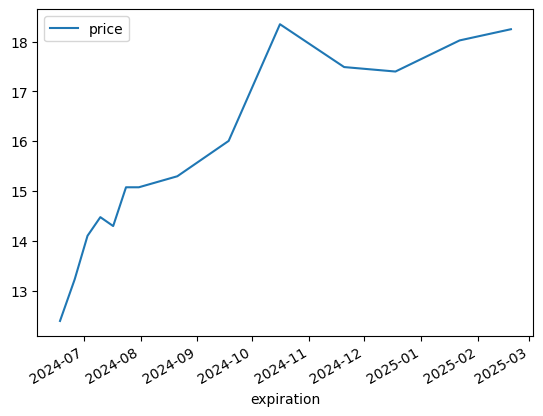

In [6]:
data.plot()

Fetches historical futures data for the symbol "CL" within the specified date range and stores it in 'data'

In [7]:
data = obb.derivatives.futures.historical(
    "CL", start_date="2020-01-01", end_date="2022-12-31"
)

In [8]:
display(data)

,open,high,low,close,volume
date,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385.0
2000-08-24,31.900000,32.240002,31.400000,31.629999,72978.0
2000-08-25,31.700001,32.099998,31.320000,32.049999,44601.0
2000-08-28,32.040001,32.919998,31.860001,32.869999,46770.0
2000-08-29,32.820000,33.029999,32.560001,32.720001,49131.0
...,...,...,...,...,...
2024-06-13,78.370003,78.889999,77.669998,78.620003,307638.0
2024-06-14,77.959999,79.150002,77.730003,78.449997,245827.0
2024-06-17,78.480003,80.660004,77.980003,80.330002,126733.0


Defines a list of expiration dates for future contracts

In [9]:
expirations = [
    "2024-12",
    "2025-12",
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
]

Initializes an empty list to store individual contract data

In [10]:
contracts = []

Iterates over each expiration date, fetching and renaming historical futures data for "CL", and appends it to 'contracts'

In [11]:
for expiration in expirations:
    df = (
        obb.derivatives.futures.historical(
            symbol="CL",
            expiration=expiration,
            start_date="2020-01-01",
            end_date="2022-12-31",
        )
    ).rename(columns={"close": expiration})
    contracts.append(df[expiration])

Combines the individual contract data into a single DataFrame, transposes it, and drops any rows with missing values

In [12]:
historical = pd.DataFrame(contracts).transpose().dropna()

In [13]:
display(historical)

,2024-12,2025-12,2026-12,2027-12,2028-12,2029-12,2030-12
date,,,,,,,
2020-01-24,50.139999,50.700001,51.560001,51.630001,51.630001,51.630001,51.630001
2020-01-27,50.599998,51.180000,51.049999,51.119999,51.119999,51.119999,51.119999
2020-01-28,50.779999,51.230000,51.549999,51.619999,51.619999,51.619999,51.619999
2020-01-29,50.639999,51.130001,51.599998,51.669998,51.669998,51.669998,51.669998
2020-01-30,50.910000,51.439999,51.490002,51.560001,51.560001,51.560001,51.560001
...,...,...,...,...,...,...,...
2024-06-12,76.040001,71.699997,68.820000,66.800003,65.400002,64.510002,63.939999
2024-06-13,76.250000,71.809998,68.849998,66.820000,65.410004,64.519997,63.950001
2024-06-14,75.870003,71.410004,68.510002,66.559998,65.230003,64.339996,63.770000


Plots the data for the most recent historical contract

<Axes: >

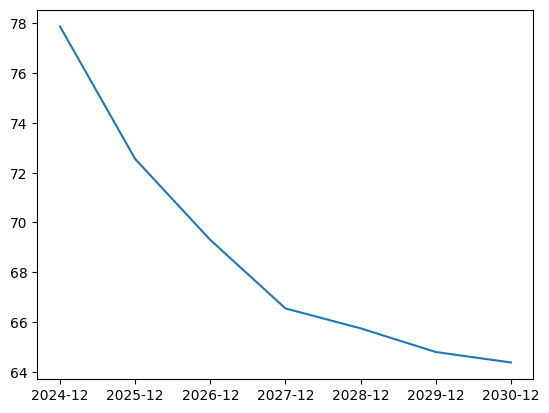

In [14]:
historical.iloc[-1].plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Navigating options market data with the OpenBB Platform

In [1]:
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches options chains for the symbol "SPY" and stores it in 'chains'

In [3]:
chains = obb.derivatives.options.chains(symbol="SPY")

In [4]:
display(chains.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9164 entries, 0 to 9163
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   contract_symbol       9164 non-null   object        
 1   expiration            9164 non-null   object        
 2   strike                9164 non-null   float64       
 3   option_type           9164 non-null   object        
 4   open_interest         9164 non-null   int64         
 5   volume                9164 non-null   int64         
 6   theoretical_price     9164 non-null   float64       
 7   last_trade_price      9164 non-null   float64       
 8   tick                  9164 non-null   object        
 9   bid                   9164 non-null   float64       
 10  bid_size              9164 non-null   int64         
 11  ask                   9164 non-null   float64       
 12  ask_size              9164 non-null   int64         
 13  open              

None

Fetches historical price data for the specified option symbol using the "yfinance" provider and selects the "close" and "volume" columns

In [5]:
historic = obb.equity.price.historical(
    symbol="SPY241220C00550000", provider="yfinance"
)[["close", "volume"]]

In [6]:
display(historic)

,close,volume
date,,
2023-06-15,5.840000,0
2023-06-16,5.630000,129
2023-06-22,4.600000,16
2023-06-23,4.000000,5
2023-06-26,4.140000,18
...,...,...
2024-06-10,19.400000,0
2024-06-11,19.950001,230
2024-06-12,22.540001,1054


Plots the historical "close" price data

<Axes: xlabel='date'>

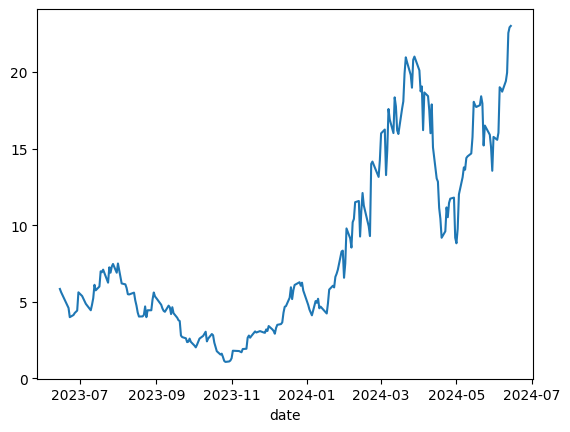

In [7]:
historic.close.plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Harnessing factor data using pandas_datareader

In [ ]:
!pip install pandas_datareader

In [2]:
import warnings

In [3]:
import pandas_datareader as pdr
from IPython.display import display

In [4]:
warnings.filterwarnings("ignore")

Fetches the Fama-French research data factors and stores it in 'factors'

In [5]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors",
)

In [6]:
display(factors["DESCR"])

'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202404 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2024 Kenneth R. French\n\n  0 : (59 rows x 4 cols)\n  1 : Annual Factors: January-December (5 rows x 4 cols)'

Displays the first few rows of the first dataset in 'factors'

In [7]:
data = factors[0].head()

In [8]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019-06,6.93,0.29,-0.71,0.18
2019-07,1.19,-1.93,0.48,0.19
2019-08,-2.58,-2.38,-4.78,0.16
2019-09,1.43,-0.96,6.75,0.18
2019-10,2.06,0.29,-1.91,0.16


Displays the first few rows of the second dataset in 'factors'

In [9]:
data = factors[1].head()

In [10]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019,28.28,-6.14,-10.46,2.15
2020,23.66,13.18,-46.67,0.45
2021,23.56,-3.89,25.49,0.04
2022,-21.60,-6.95,25.81,1.43
2023,21.70,-3.24,-13.60,4.95


Fetches the Fama-French research data factors within the specified date range and stores it in 'factors'

In [11]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors", start="2000-01-01", end="2019-12-31"
)

In [12]:
display(factors)

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.77 -1.88  0.41
 2000-02    2.45  21.36 -9.59  0.43
 2000-03    5.20 -17.20  8.13  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.05  4.75  0.50
 ...         ...    ...   ...   ...
 2019-08   -2.58  -2.38 -4.78  0.16
 2019-09    1.43  -0.96  6.75  0.18
 2019-10    2.06   0.29 -1.91  0.16
 2019-11    3.87   0.77 -2.02  0.12
 2019-12    2.77   0.73  1.75  0.14
 
 [240 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.98  5.89
 2001  -15.21  18.16  18.52  3.83
 2002  -22.76   4.38   8.10  1.65
 2003   30.75  26.54   4.61  1.02
 2004   10.72   4.46   7.61  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.08  11.93  4.80
 2007    1.04  -7.44 -17.18  4.66
 2008  -38.34   2.40   1.05  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.15  -5.17  0.12
 2011    0.44  -5.73  -8.41  0.04
 2012   16.27  -1.40   

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.